# **Introduction**

This notebook analyzes customer data from PowerCo, a gas and electricity utility provider. The goal is to understand the structure and key features of the dataset, explore basic descriptive statistics, visualize the data, and begin to form insights that will help in addressing the issue of customer churn and pricing strategies.

## **Client Data Overview**

The client data (`client_data.csv`) contains detailed information about PowerCo's customers, including:
- **Usage data**: Monthly consumption of electricity and gas, both historical and forecasted.
- **Contract data**: Information on contract dates, renewal, and product modifications.
- **Pricing data**: The forecasted pricing for electricity and power, both at peak and off-peak times.
- **Churn indicator**: Whether a customer has churned over the next 3 months.

### Key Features in Client Data:
1. **Electricity and Gas Consumption**: Historical consumption data over 12 months, along with consumption for the last month.
2. **Forecasted Consumption**: Projected usage for electricity and gas, helping to assess future demand.
3. **Contract Dates**: The start, end, and renewal dates of customer contracts.
4. **Pricing and Margin Information**: Pricing information on electricity and power for off-peak, peak, and mid-peak periods.
5. **Customer Behavior**: The churn column, which indicates whether a customer is likely to churn in the next 3 months, is of particular interest for predicting retention.

## **Pricing Data Overview**

The pricing data (`price_data.csv`) focuses on energy pricing:
- **Off-Peak, Peak, and Mid-Peak Pricing**: Prices for energy during different periods, both fixed and variable.
- **Historical Data**: The data includes reference dates for pricing, giving insight into how energy pricing has fluctuated over time.

### Key Features in Pricing Data:
1. **Energy Price Categories**: Prices are separated into off-peak, peak, and mid-peak periods.
2. **Variable vs. Fixed Pricing**: Prices are available in both fixed and variable formats, which could provide insights into customer behavior and price sensitivity.

## **Data Description**

Understanding the column names and their meanings is the first step in effectively analyzing the data. The data descriptions are crucial for interpreting the content of each column. Some columns, like hashed text strings, may not be immediately interpretable but may still hold predictive power.

### Data Analysis Approach

1. **Examine the Data**: The first step will be to inspect the datasets, check the data types of each column, and review the first few records to get a feel for the structure and any missing values.
2. **Descriptive Statistics**: Next, we will generate basic statistics such as mean, median, and standard deviation for key numeric columns. This will help us understand the range and variability of values.
3. **Data Distributions**: We will visualize the distributions of key features, such as electricity consumption, margins, and churn, to get insights into the patterns and outliers in the data.
4. **Investigate Churn**: The churn column is essential for understanding customer retention. By exploring its relationship with other features (like pricing, consumption, and contract duration), we can begin to build hypotheses on what factors contribute to churn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("C:\\Users\\attafuro\\Desktop\\BCG Virtual Internship\\client_data.csv")
df_1= pd.read_csv("C:\\Users\\attafuro\\Desktop\\BCG Virtual Internship\\client_data.csv")

In [30]:
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

## DATA CLEANING (CLIENT DATA)

In [32]:
df['date_activ'] = pd.to_datetime(df['date_activ'])
df['date_end'] = pd.to_datetime(df['date_end'])
df['date_modif_prod'] = pd.to_datetime(df['date_modif_prod'])
df['date_renewal'] = pd.to_datetime(df['date_renewal'])

In [33]:
df.duplicated().sum()

0

In [34]:
df.loc[df['channel_sales'] == 'MISSING', 'channel_sales'] = 'Unknown'

In [35]:
# Map 't' to 1 and 'f' to 0 in the 'has_gas' column
df['has_gas'] = df['has_gas'].map({'t': 1, 'f': 0})

In [36]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,1,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,Unknown,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


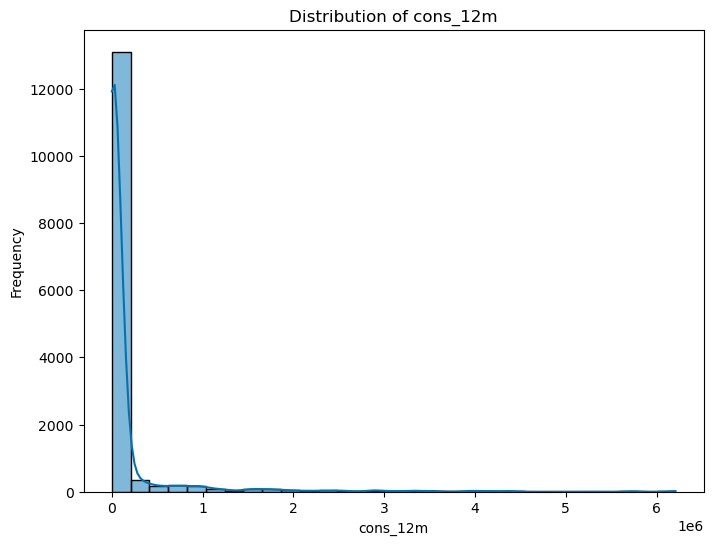

In [42]:
# Set the color palette globally to be colorblind-friendly
sns.set_palette("colorblind")

plt.figure(figsize=(8, 6))
sns.histplot(df['cons_12m'], kde=True, bins=30)
plt.title('Distribution of cons_12m')
plt.xlabel('cons_12m')
plt.ylabel('Frequency')
plt.show()

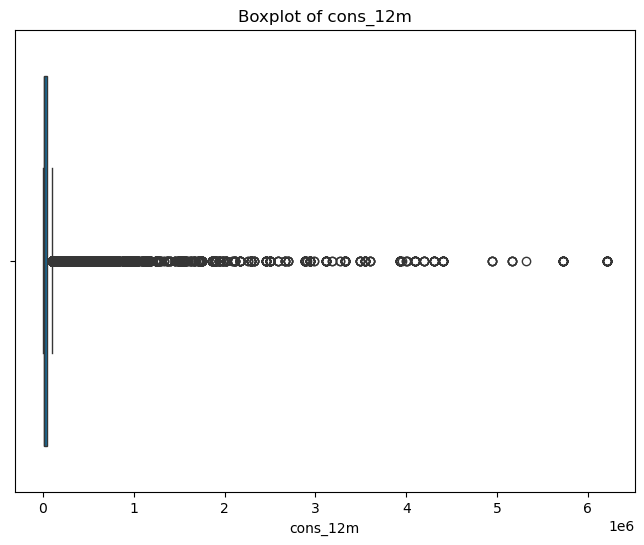

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['cons_12m'])
plt.title('Boxplot of cons_12m')
plt.xlabel('cons_12m')
plt.show()

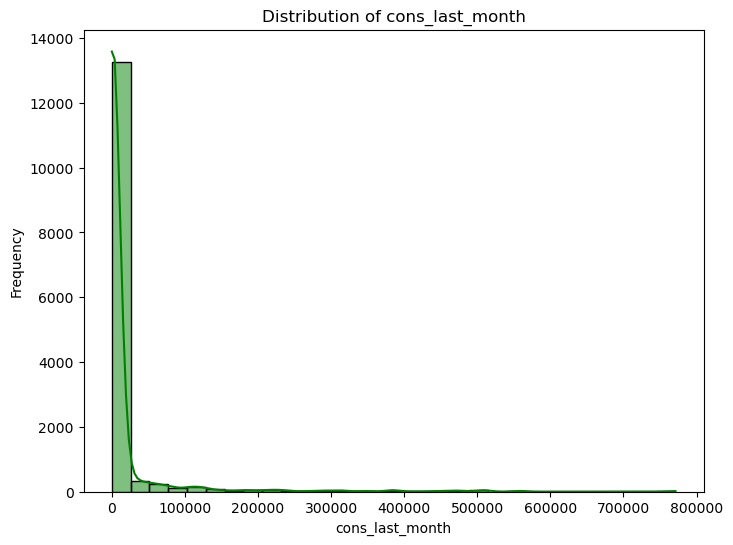

In [50]:
plt.figure(figsize=(8, 6))
sns.histplot(df['cons_last_month'], kde=True, bins=30, color="green")
plt.title('Distribution of cons_last_month')
plt.xlabel('cons_last_month')
plt.ylabel('Frequency')
plt.show()

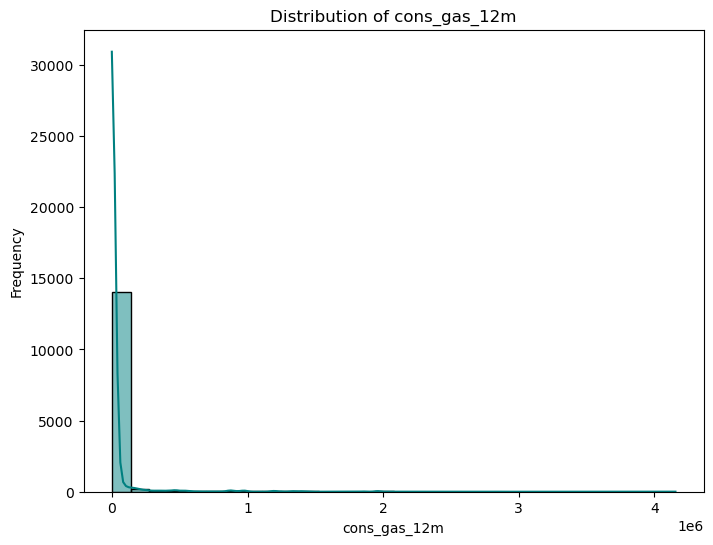

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(df['cons_gas_12m'], kde=True, bins=30, color="teal")
plt.title('Distribution of cons_gas_12m')
plt.xlabel('cons_gas_12m')
plt.ylabel('Frequency')
plt.show()

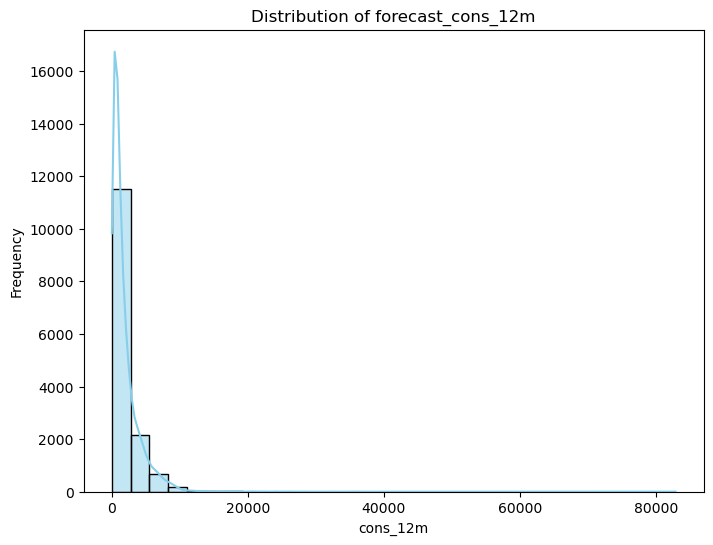

In [52]:
plt.figure(figsize=(8, 6))
sns.histplot(df['forecast_cons_12m'], kde=True, bins=30, color="skyblue")
plt.title('Distribution of forecast_cons_12m')
plt.xlabel('cons_12m')
plt.ylabel('Frequency')
plt.show()

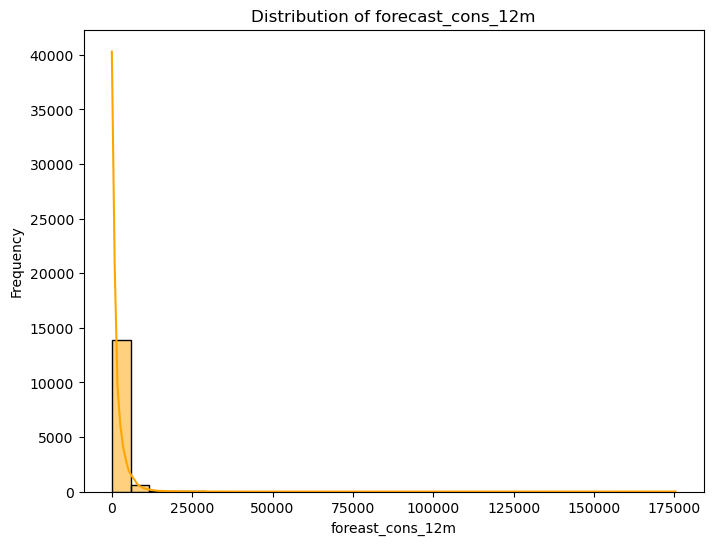

In [54]:
plt.figure(figsize=(8, 6))
sns.histplot(df['forecast_cons_year'], kde=True, bins=30, color="orange")
plt.title('Distribution of forecast_cons_12m')
plt.xlabel('foreast_cons_12m')
plt.ylabel('Frequency')
plt.show()

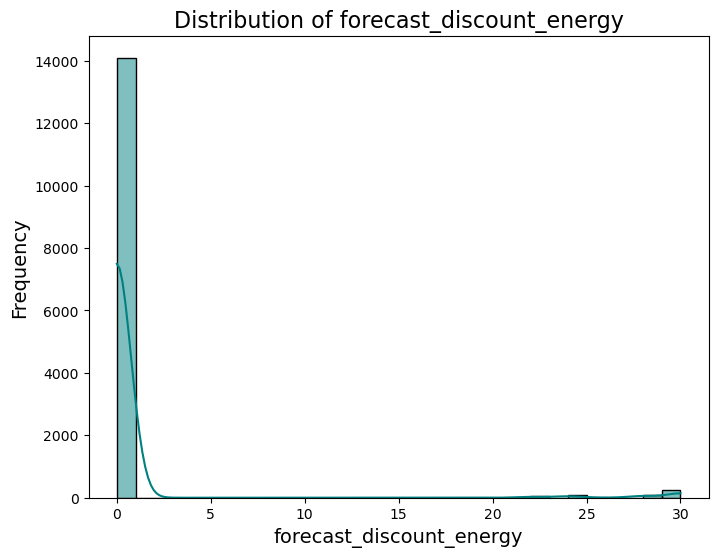

In [55]:
# Plot histogram for 'forecast_discount_energy'
plt.figure(figsize=(8, 6))
sns.histplot(df['forecast_discount_energy'], kde=True, bins=30, color="teal")
plt.title('Distribution of forecast_discount_energy', fontsize=16)
plt.xlabel('forecast_discount_energy', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


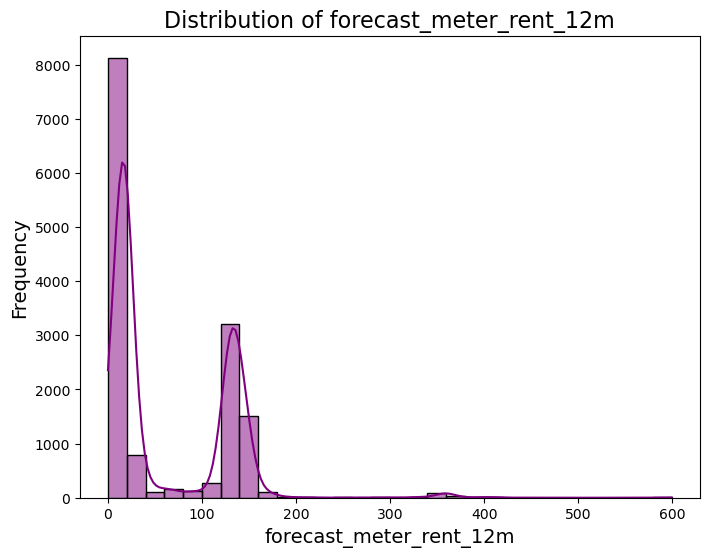

In [56]:
# Plot for 'forecast_meter_rent_12m'
plt.figure(figsize=(8, 6))
sns.histplot(df['forecast_meter_rent_12m'], kde=True, bins=30, color="purple")
plt.title('Distribution of forecast_meter_rent_12m', fontsize=16)
plt.xlabel('forecast_meter_rent_12m', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

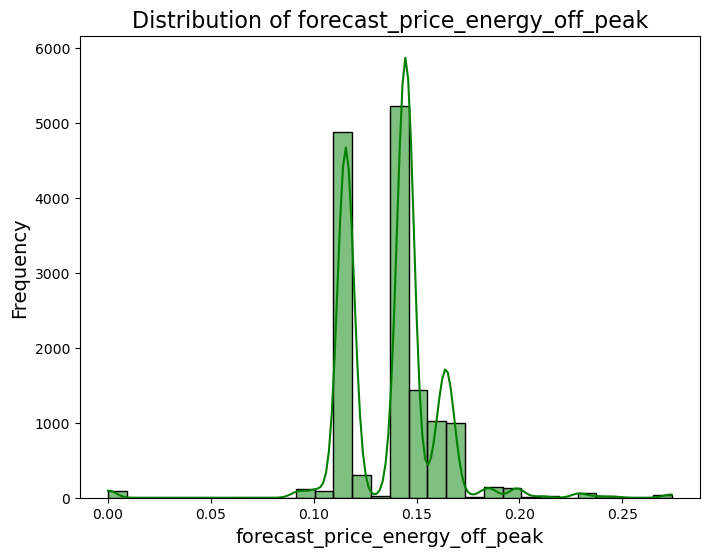

In [57]:
# Plot for 'forecast_price_energy_off_peak'
plt.figure(figsize=(8, 6))
sns.histplot(df['forecast_price_energy_off_peak'], kde=True, bins=30, color="green")
plt.title('Distribution of forecast_price_energy_off_peak', fontsize=16)
plt.xlabel('forecast_price_energy_off_peak', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

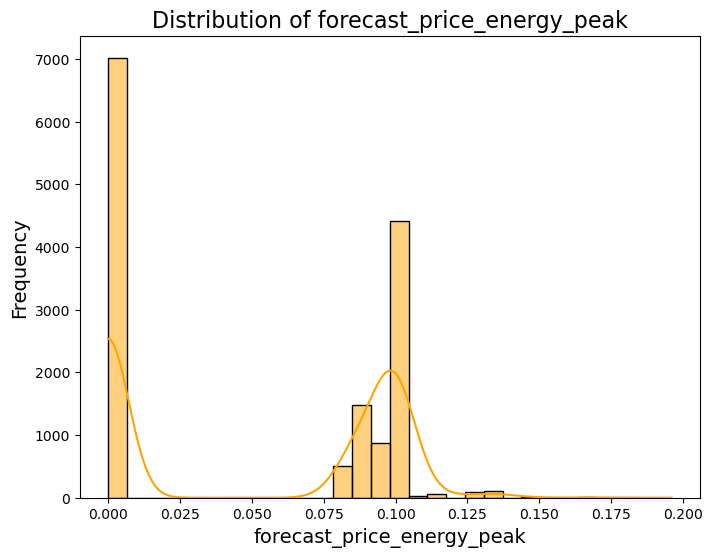

In [58]:
# Plot for 'forecast_price_energy_peak'
plt.figure(figsize=(8, 6))
sns.histplot(df['forecast_price_energy_peak'], kde=True, bins=30, color="orange")
plt.title('Distribution of forecast_price_energy_peak', fontsize=16)
plt.xlabel('forecast_price_energy_peak', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

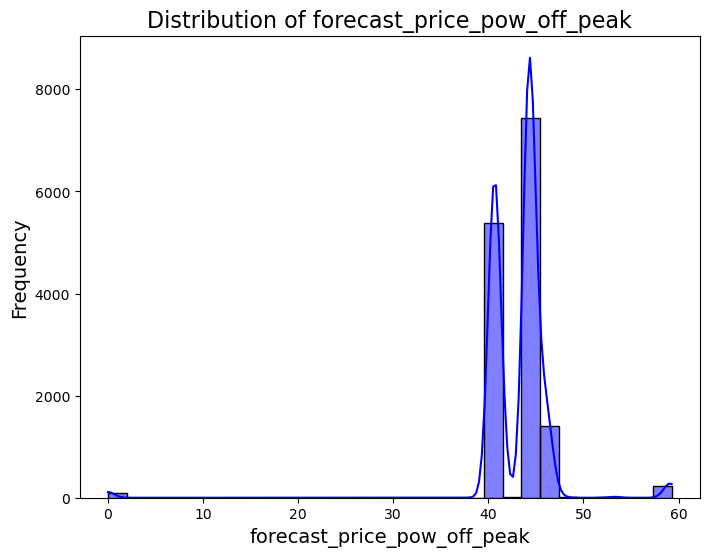

In [59]:
plt.figure(figsize=(8, 6))
sns.histplot(df['forecast_price_pow_off_peak'], kde=True, bins=30, color="blue")
plt.title('Distribution of forecast_price_pow_off_peak', fontsize=16)
plt.xlabel('forecast_price_pow_off_peak', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

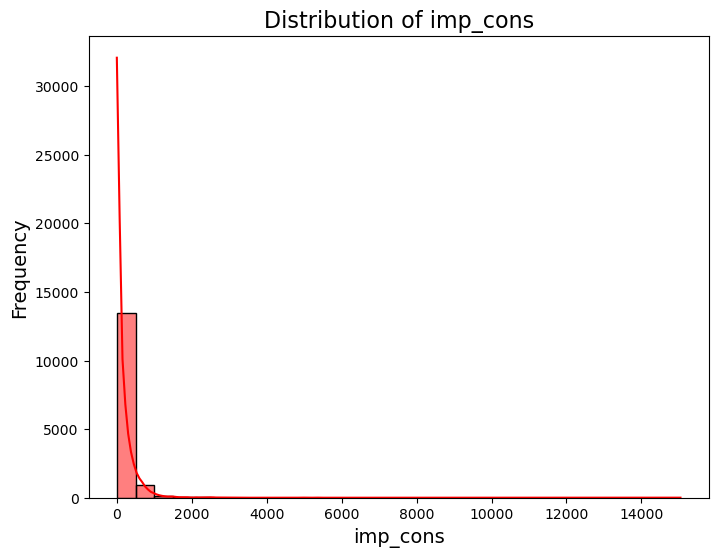

In [60]:
# Plot for 'imp_cons'
plt.figure(figsize=(8, 6))
sns.histplot(df['imp_cons'], kde=True, bins=30, color="red")
plt.title('Distribution of imp_cons', fontsize=16)
plt.xlabel('imp_cons', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

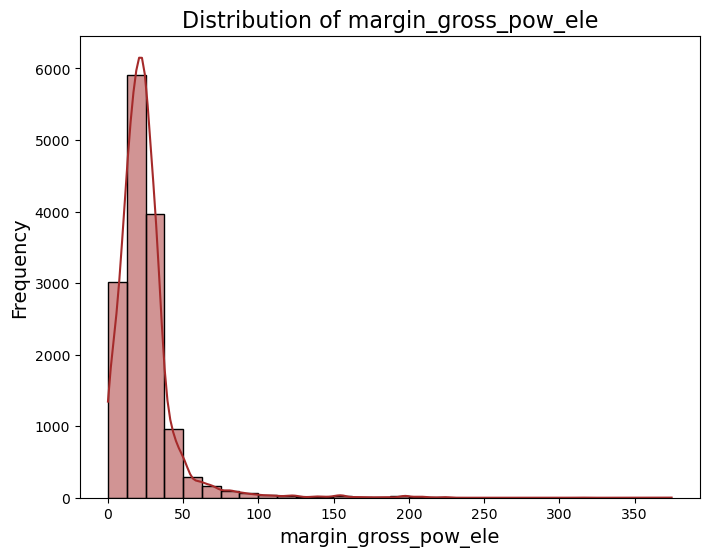

In [61]:
# Plot for 'margin_gross_pow_ele'
plt.figure(figsize=(8, 6))
sns.histplot(df['margin_gross_pow_ele'], kde=True, bins=30, color="brown")
plt.title('Distribution of margin_gross_pow_ele', fontsize=16)
plt.xlabel('margin_gross_pow_ele', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

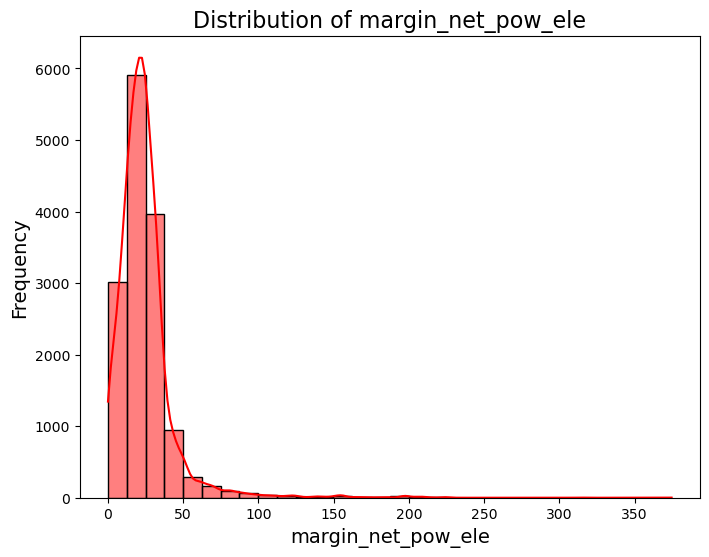

In [63]:
# Plot for 'margin_net_pow_ele'
plt.figure(figsize=(8, 6))
sns.histplot(df['margin_net_pow_ele'], kde=True, bins=30, color="red")
plt.title('Distribution of margin_net_pow_ele', fontsize=16)
plt.xlabel('margin_net_pow_ele', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

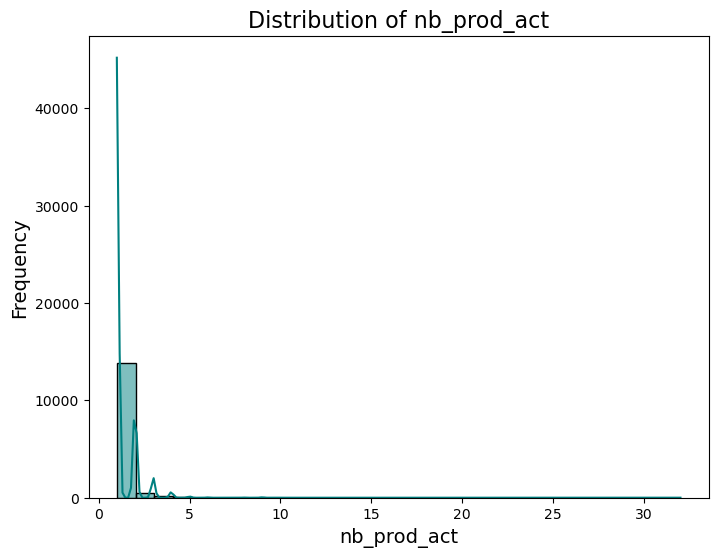

In [65]:
# Plot for 'nb_prod_act'
plt.figure(figsize=(8, 6))
sns.histplot(df['nb_prod_act'], kde=True, bins=30, color="teal")
plt.title('Distribution of nb_prod_act', fontsize=16)
plt.xlabel('nb_prod_act', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

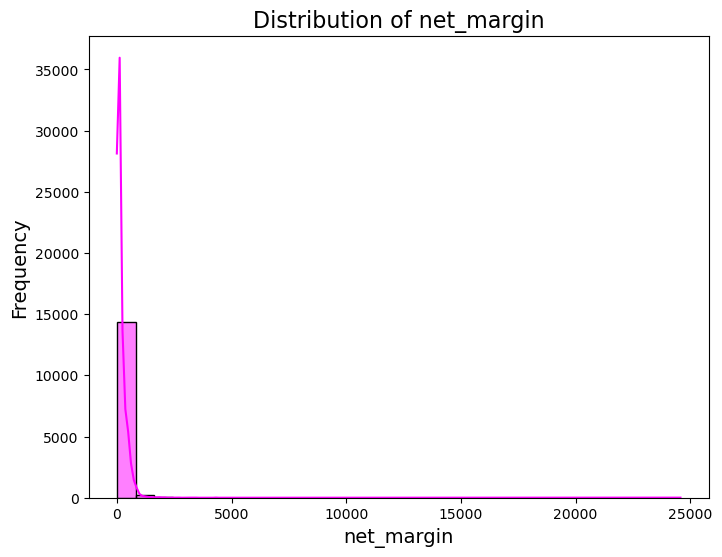

In [66]:
# Plot for 'net_margin'
plt.figure(figsize=(8, 6))
sns.histplot(df['net_margin'], kde=True, bins=30, color="magenta")
plt.title('Distribution of net_margin', fontsize=16)
plt.xlabel('net_margin', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

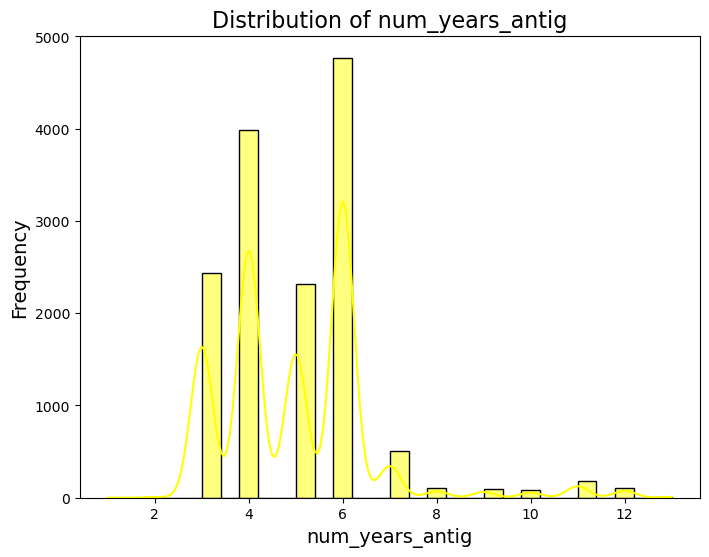

In [67]:
# Plot for 'num_years_antig'
plt.figure(figsize=(8, 6))
sns.histplot(df['num_years_antig'], kde=True, bins=30, color="yellow")
plt.title('Distribution of num_years_antig', fontsize=16)
plt.xlabel('num_years_antig', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

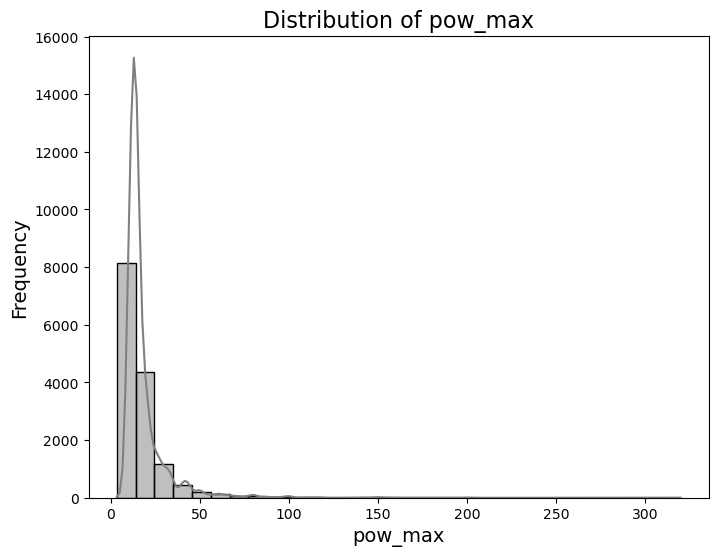

In [68]:
# Plot for 'pow_max'
plt.figure(figsize=(8, 6))
sns.histplot(df['pow_max'], kde=True, bins=30, color="gray")
plt.title('Distribution of pow_max', fontsize=16)
plt.xlabel('pow_max', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()